# Causal Discovery with Census Data

Code authored by: Shawhin Talebi <br />
Causal Discovery Toolbox: https://fentechsolutions.github.io/CausalDiscoveryToolbox/html/index.html <br />
Data from: https://archive.ics.uci.edu/ml/datasets/census+income

### Import libraries

In [1]:
import pickle
import cdt
import networkx as nx
import matplotlib.pyplot as plt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


### Load data

In [2]:
df = pickle.load( open( "df_causal_discovery.p", "rb" ) )

### Get skeleton using graph Lasso

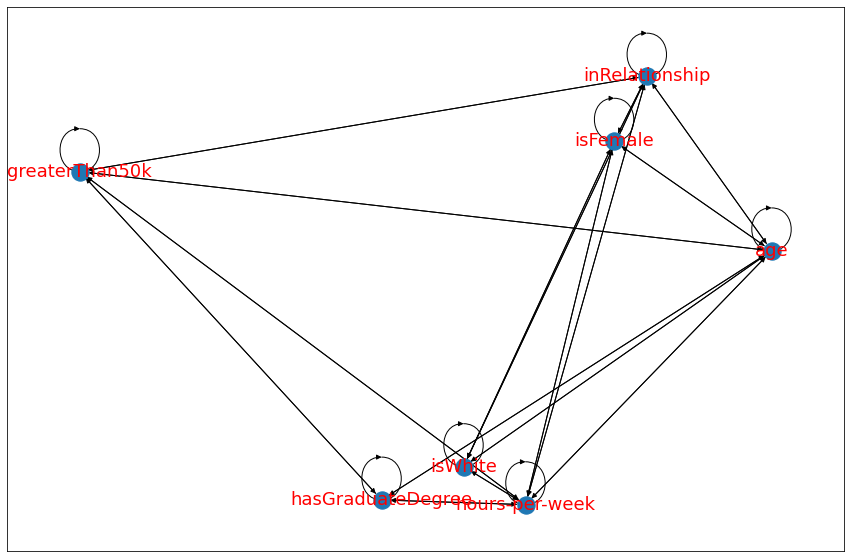

In [3]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton = glasso.predict(df)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

### Use causal discovery to get causal model

#### PC

PC is ran on the skeleton of the given graph.


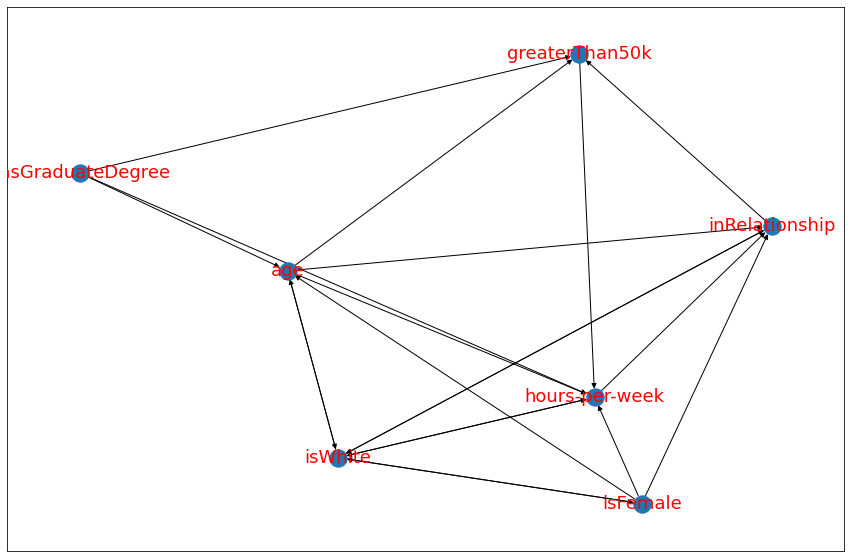

In [4]:
cdt.SETTINGS.rpath = 'C:/Program Files/R/R-4.1.2/bin/Rscript'

model_pc = cdt.causality.graph.PC()
# graph_pc = model_pc.predict(df)
graph_pc = model_pc.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

# get adjaceny matrix of PC graph
A_pc = nx.adjacency_matrix(graph_pc).todense()

#### GES

GES is ran on the skeleton of the given graph.


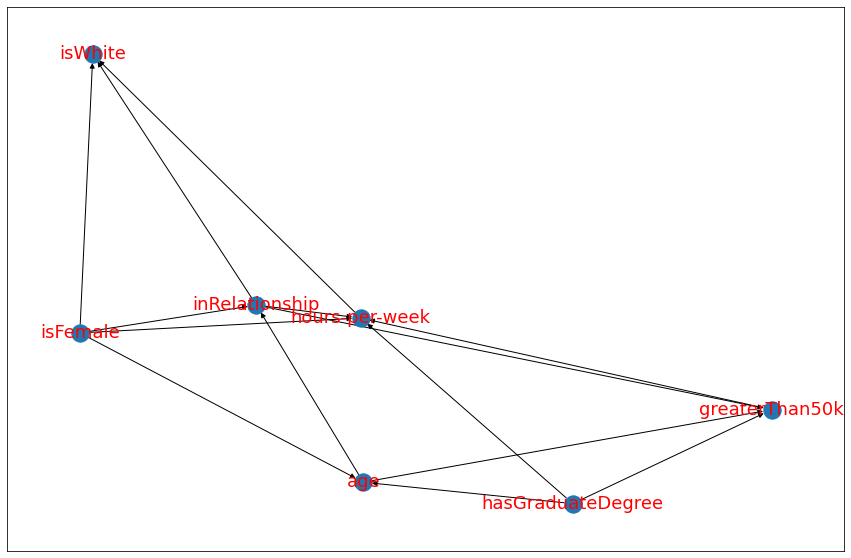

In [5]:
# initialize causal discovery model
model_ges = cdt.causality.graph.GES()
# apply causal discovery model to data and skeleton
graph_ges = model_ges.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_ges, font_size=18, font_color='r')

# get adjaceny matrix of GES graph
A_ges = nx.adjacency_matrix(graph_ges).todense()

In [6]:
import subprocess
command = "C:\Program Files\R\R-4.1.2\bin\Rscript"
arg = '--vanilla'
path2script = "C:/test.R"
output = subprocess.call([command, arg, path2script], shell=True)
print (output)


1


In [7]:
import cdt
import networkx as nx
from cdt.causality.graph import PC
from cdt.data import load_dataset
data, graph = load_dataset("sachs")
cdt.SETTINGS.rpath= r"C:\Program Files\R\R-4.1.2\bin\Rscript"
obj = PC()

#### GIES

GIES is ran on the skeleton of the given graph.


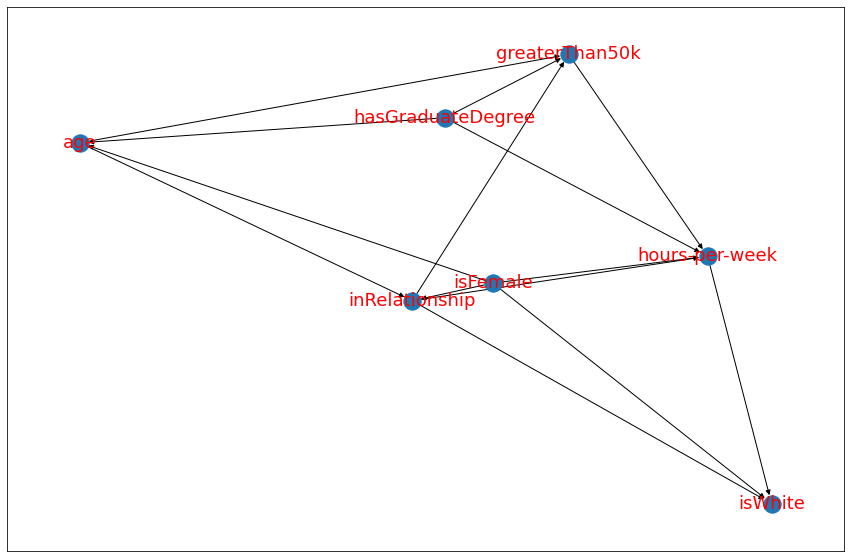

In [8]:
model_gies = cdt.causality.graph.GIES()
graph_gies = model_gies.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_gies, font_size=18, font_color='r')

# get adjaceny matrix of GIES graph
A_gies = nx.adjacency_matrix(graph_gies).todense()

#### LiNGAM

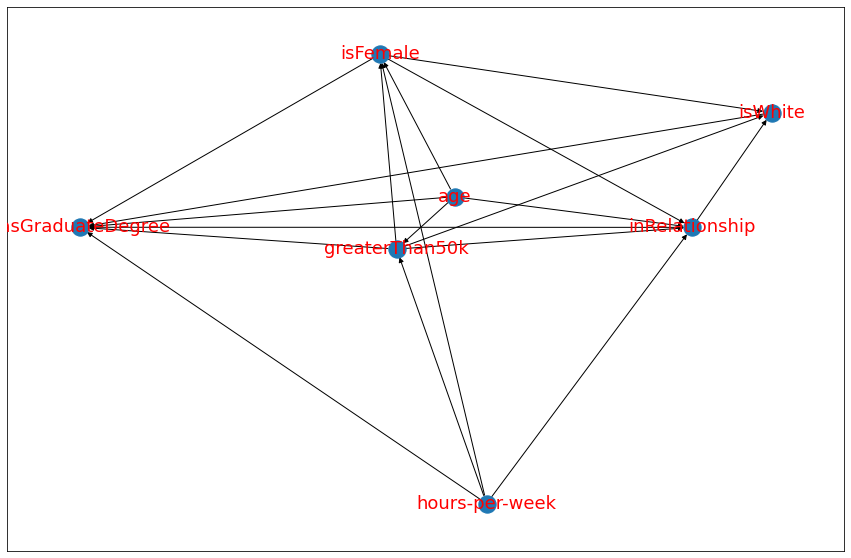

In [9]:
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(df)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_lingam, font_size=18, font_color='r')

# get adjaceny matrix of LiNGAM graph
A_lingam = nx.adjacency_matrix(graph_lingam).todense()